In [5]:
# import required packages and read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

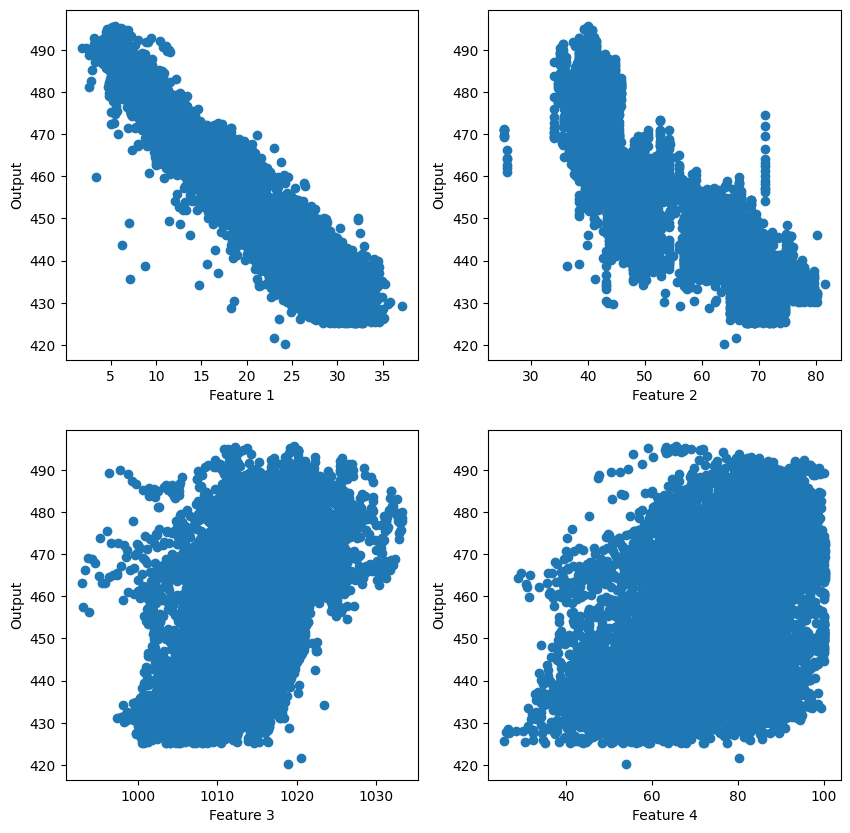

In [6]:
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
plt.figure(figsize=(10,10))
subplot = 221
for i in range(4):
    plt.subplot(subplot)
    plt.scatter(data[:,i], data[:,4])
    plt.xlabel('Feature ' + str(i+1))
    plt.ylabel('Output')
    subplot += 1
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'RH vs EP'))

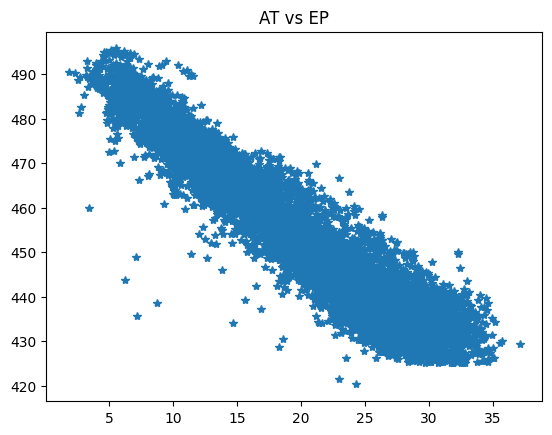

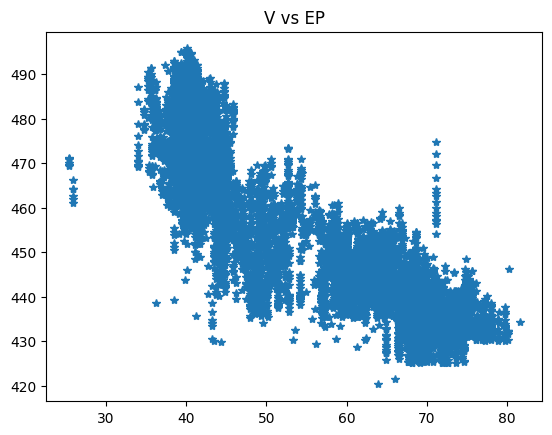

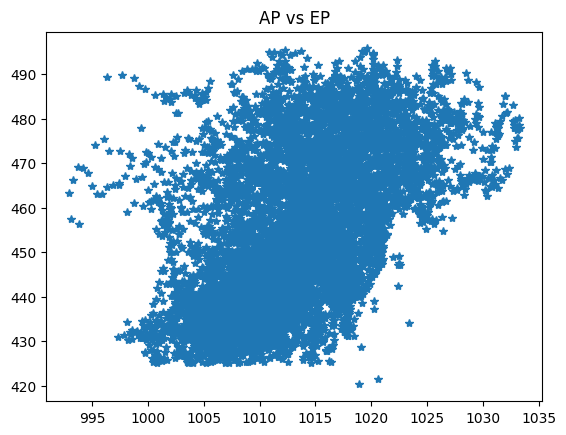

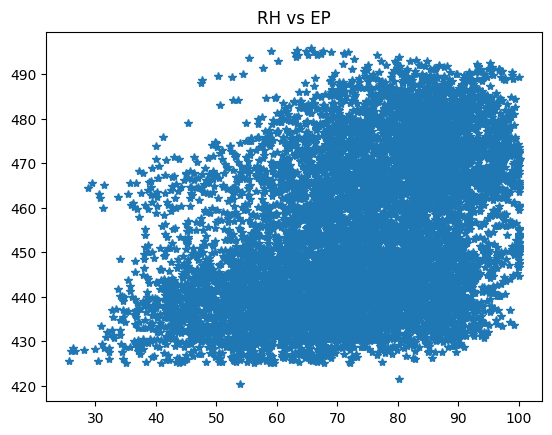

In [7]:
# plot input vs output for each input
plt.figure(), plt.plot(X[:,0], y, '*'), plt.title('AT vs EP')
plt.figure(), plt.plot(X[:,1], y, '*'), plt.title('V vs EP')
plt.figure(), plt.plot(X[:,2], y, '*'), plt.title('AP vs EP')
plt.figure(), plt.plot(X[:,3], y, '*'), plt.title('RH vs EP')

In [9]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

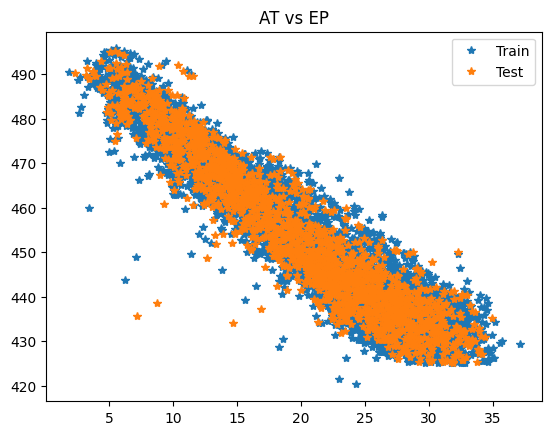

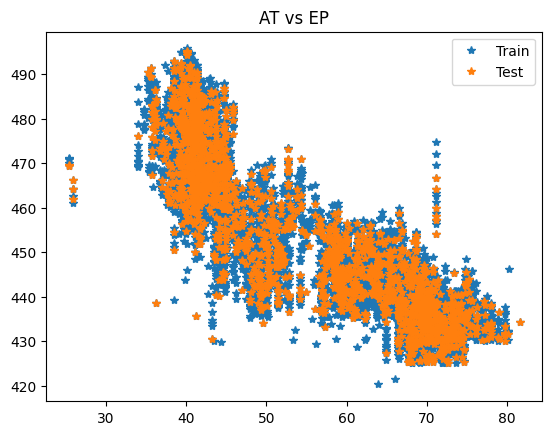

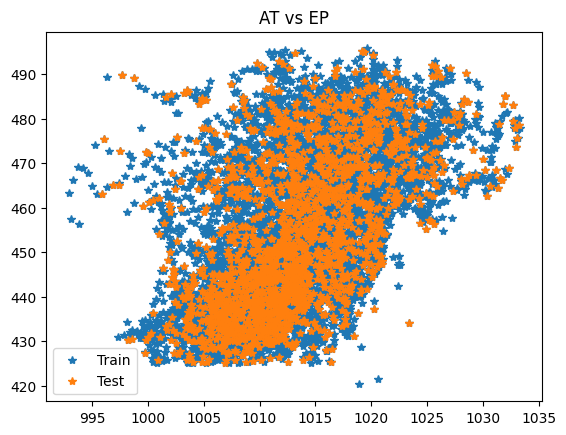

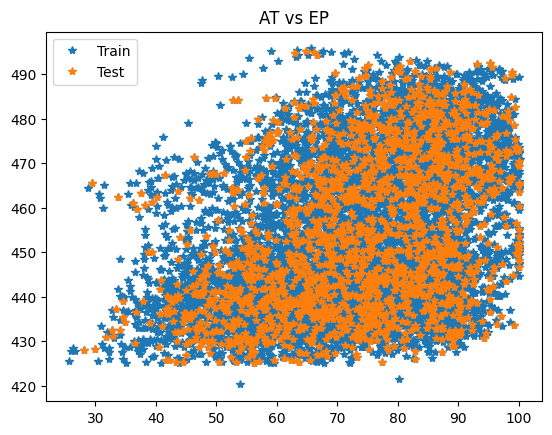

In [10]:
# plot input vs output for each input
plt.figure(), plt.plot(X_train[:,0], y_train, '*'), plt.title('AT vs EP')
plt.plot(X_test[:,0], y_test, '*'), plt.title('AT vs EP')
plt.legend(['Train', 'Test'])
plt.figure(), plt.plot(X[:,1], y, '*'), plt.title('V vs EP')
plt.plot(X_test[:,1], y_test, '*'), plt.title('AT vs EP')
plt.legend(['Train', 'Test'])
plt.figure(), plt.plot(X[:,2], y, '*'), plt.title('AP vs EP')
plt.plot(X_test[:,2], y_test, '*'), plt.title('AT vs EP')
plt.legend(['Train', 'Test'])
plt.figure(), plt.plot(X[:,3], y, '*'), plt.title('RH vs EP')
plt.plot(X_test[:,3], y_test, '*'), plt.title('AT vs EP')
plt.legend(['Train', 'Test'])

In [11]:
# scale data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# define model
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_shape=(4,)))
# 8 neurons in 1st hidden layer
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
# 5 neurons in 2nd layer
model.add(Dense(1)) # 1 neuron in output layer

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# compile model
model.compile(loss='mse', optimizer='Adam') # mean-squared error is to be minimized

In [21]:
# fit model
model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=50)

Epoch 1/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 1.7050
Epoch 2/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3455  
Epoch 3/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.1533
Epoch 4/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1119 
Epoch 5/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0958  
Epoch 6/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0847  
Epoch 7/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.0763
Epoch 8/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0779
Epoch 9/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0740  
Epoch 10/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0704  
Epoch 11/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.0665
Epoch 12/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0699
Epoch 13/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0714  
Epoch 14/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0642  
Epoch 15/25
154/154 ━━━━━━━━━━

In [22]:
# predict y_test
y_test_scaled_pred = model.predict(X_test_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'y_test vs y_test_pred'))

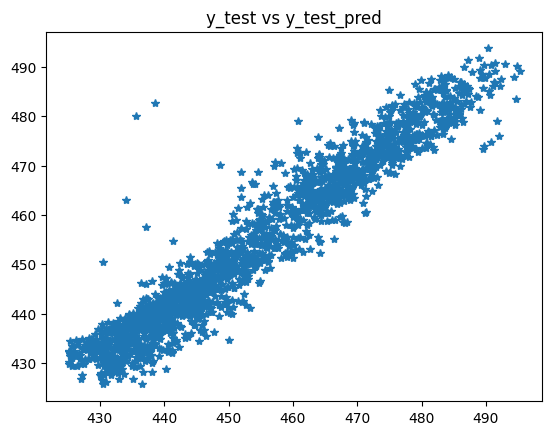

In [23]:
plt.figure(), plt.plot(y_test, y_test_pred, '*'), plt.title('y_test vs y_test_pred')

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

Neural Net Hyperparameter Optimization

In [25]:
# separate training, validation, test data
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [27]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [29]:
# import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [19]:
# model function
def FFNN_model(hidden_layers, layer_size, regularizationValue, learningRate):
    model = Sequential()
    model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal', input_shape=(4,)))
    for _ in range(hidden_layers-1):
        model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(1))
        model.compile(loss='mse', optimizer=Adam(learning_rate=learningRate))
    return model

In [20]:
# KerasRegressor
from scikeras.wrappers import KerasRegressor
model = KerasRegressor(build_fn=FFNN_model, epochs=25, batch_size=50)

In [21]:
model = KerasRegressor(build_fn=FFNN_model, epochs=25, batch_size=50, hidden_layers=2, layer_size=8, regularizationValue=0.01, learningRate=0.01)

In [22]:
# gridSearchCV
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={
"learningRate":[0.05, 0.01, 0.1]}

In [24]:
model

KerasRegressor(
	model=None
	build_fn=<function FFNN_model at 0x000002100C085A80>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	hidden_layers=2
	layer_size=8
	regularizationValue=0.01
	learningRate=0.01
)

In [25]:
grid_searchcv = GridSearchCV(model, param_grid, cv=5)

In [26]:
print(grid_searchcv)
print(X_val_scaled)
grid_searchcv.fit(X_est_scaled, y_est_scaled)

GridSearchCV(cv=5,
             estimator=KerasRegressor(batch_size=50, build_fn=<function FFNN_model at 0x000002100C085A80>, epochs=25, hidden_layers=2, layer_size=8, learningRate=0.01, regularizationValue=0.01),
             param_grid={'learningRate': [0.05, 0.01, 0.1]})
[[-0.48179754 -1.38148977  0.05263255  0.09524397]
 [ 0.02838709  0.61724003  1.13577517  0.23138685]
 [ 0.17757947  0.69517396  0.54822139  1.24020553]
 ...
 [ 0.5718736   0.88174307  0.15311276 -2.04151841]
 [-0.25934106  0.17876327  1.07276215  0.46827544]
 [-0.91072561 -0.90680128  2.21040251  0.10409326]]
Epoch 1/25


c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8898 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2055  
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1467
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1395
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1222
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1254  
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1140
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1197
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1102  
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1052  
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1016  
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1111  
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1002  
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.1119
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1023  
Epoch 16/

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4285  
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1413  
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1136
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1129
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1114  
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1101  
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1039  
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1090
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1068
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.1028
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1008  
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.1124
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0959  
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0893  
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0917  
Epoch 16

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7068 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1845  
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1239
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1141
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1052  
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1038  
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1008  
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0964
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0921  
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1085
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0931  
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0933
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0973
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0928
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0913
Epoch 16/25
86/86

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8479 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1993
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1268
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1064
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1043
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1111
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1064
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1093
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1131
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1026
Epoch 16/25
86/86 ━━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8644   
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2896
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1976
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1627
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1392
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1240
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1168
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1189
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1197
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1097
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1083
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1040
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1013
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1057
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1020
Epoch 16/25
86/86 ━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6464  
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4282
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3335
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2744
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2346
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1996
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1804
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1648
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1554
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1475
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1369
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1302
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1277
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1220
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1111
Epoch 16/25
86/86 ━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6874  
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2688
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1860
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1448
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1255  
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1124
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1007
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0973
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0963
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0922
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0887
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0911
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0897
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0887
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0873
Epoch 16/25
86/86 ━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4186 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4629
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3852
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3283
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2840
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2490
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2209
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1947
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1741
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1562
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1406
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1249
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1191
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1104
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1095
Epoch 16/25
86/86 ━━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7780 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2766
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1958
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1642
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1420
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1317
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1219
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1091
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1028
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1048
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0980
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0986
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0896
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0965
Epoch 16/25
86/86 ━━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6352 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2982
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2082
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1531
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1322
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1190
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1117
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0980
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0947
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1010
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0966
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0920
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0899
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0856
Epoch 16/25
86/86 ━━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7460  
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1592
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1221
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1200
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1194
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1361
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1267
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1193
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1157
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1167
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1214  
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1333
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1152  
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1236
Epoch 16/25
86/86 ━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8704
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1777
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1313
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1111
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1069
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1090
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1035
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1103
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1035
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1178
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1163
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1008
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1074
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1013
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1026
Epoch 16/25
86/86 ━━━━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5454 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1372
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1255
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1214
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1194
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1359
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1218
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1213
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1213
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1206
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1218
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1178  
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1240
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1163
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1252
Epoch 16/25
86/86 ━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5865 
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1275
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1213
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1197
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1160
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1217
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1181
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1174
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1062
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1020
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1007
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1030
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1085
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1059
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1031  
Epoch 16/25
86/86 ━━━━━━━━━

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7319
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1600
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1189
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1168  
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1073  
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1039
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1080
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0969
Epoch 9/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0956
Epoch 10/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1011
Epoch 11/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0984
Epoch 12/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1025
Epoch 13/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1038
Epoch 14/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0992
Epoch 15/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1095
Epoch 16/25
86/

c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\lugos\VSCode Projects\Git\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5762
Epoch 2/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1565
Epoch 3/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1330
Epoch 4/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1207
Epoch 5/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1111
Epoch 6/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1005
Epoch 7/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1057
Epoch 8/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1033
Epoch 9/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1072
Epoch 10/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0935
Epoch 11/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0924
Epoch 12/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0938
Epoch 13/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0941
Epoch 14/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0957
Epoch 15/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0922


GridSearchCV(cv=5,
             estimator=KerasRegressor(batch_size=50, build_fn=<function FFNN_model at 0x000002100C085A80>, epochs=25, hidden_layers=2, layer_size=8, learningRate=0.01, regularizationValue=0.01),
             param_grid={'learningRate': [0.05, 0.01, 0.1]})

In [27]:
print("The best parameters obtained are:", grid_searchcv.best_params_)

The best parameters obtained are: {'learningRate': 0.05}


11.6 Strategies for Improved Network Training

In [43]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [44]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [45]:
# fetch data
data = pd.read_csv('kamyr-digester.csv', usecols = range(1,23)) 

In [46]:
# pre-process
# find the # of nan entries in each column
na_counts = data.isna().sum(axis = 0) 

# remove columns that have a lot of nan entries
data_cleaned = data.drop(columns = ['AAWhiteSt-4 ','SulphidityL-4 ']) 

# remove any row that have any nan entry
data_cleaned = data_cleaned.dropna(axis = 0) 

# separate X, y
y = data_cleaned.iloc[:,0].values[:,np.newaxis] # StandardScaler requires 2D array
X = data_cleaned.iloc[:,1:].values

print('Number of samples left: ', X.shape[0])

Number of samples left:  263


In [47]:
# separate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [48]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [49]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [51]:
# define model
def FFNN_model():
    model = Sequential()
    model.add(Dense(20, activation='tanh', kernel_initializer='he_normal', input_shape=(19,)))
    model.add(Dense(5, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='Adam')
    return model

In [60]:
# fit model
history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.2836 - val_loss: 1.3812
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0484 - val_loss: 1.2587
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8988 - val_loss: 1.1870
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8062 - val_loss: 1.1434
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7481 - val_loss: 1.1105
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7074 - val_loss: 1.0795
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6745 - val_loss: 1.0486
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6458 - val_loss: 1.0191
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6200 - val_loss: 0.9924
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5965 - val_loss: 0.9692
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5747 - val_loss: 0.9493
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5542 - val_lo

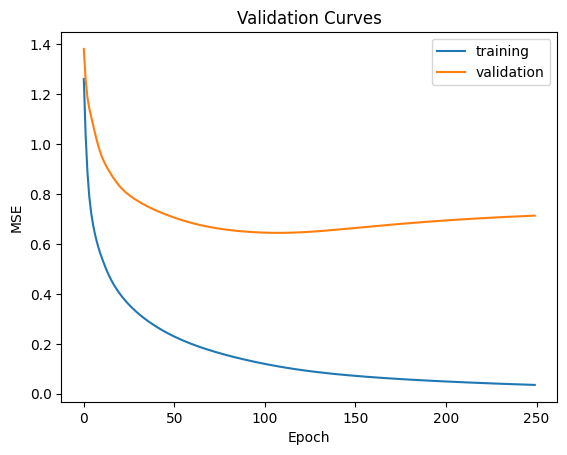

In [61]:
# validation plot
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [62]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [63]:
# fit model again with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=15)

history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled), callbacks=es)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.7750 - val_loss: 2.3222
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4260 - val_loss: 2.1648
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1486 - val_loss: 2.0279
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9130 - val_loss: 1.9067
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7122 - val_loss: 1.7976
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5410 - val_loss: 1.6983
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3950 - val_loss: 1.6077
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2698 - val_loss: 1.5251
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1619 - val_loss: 1.4503
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0682 - val_loss: 1.3828
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9864 - val_loss: 1.3224
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9149 - val_lo

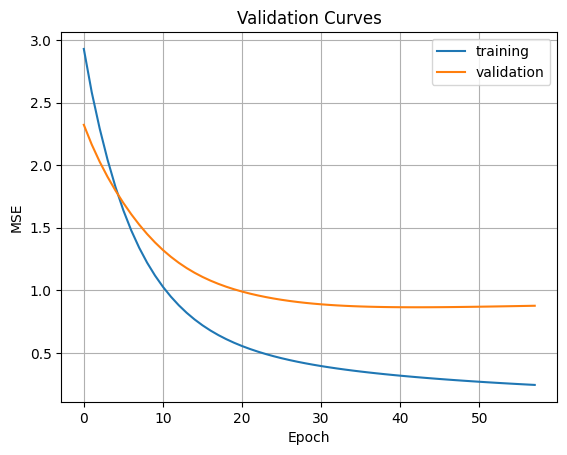

In [64]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.grid()
plt.show()

11.7 Soft Sensing via FFNN for Debutanizer Column in a Petroleum Refinery 


In [65]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [66]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [68]:
# read data
data = np.loadtxt('debutanizer_data.txt', skiprows=5)

In [69]:
# separate training, validation, and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 100)

In [70]:
#%% import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [71]:
# define model
model = Sequential()
model.add(Dense(60, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal', input_shape=(7,)))
model.add(Dense(30, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, kernel_regularizer=regularizers.L1(0.0000001)))

In [72]:
# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.005))

In [73]:
# fit model
es = EarlyStopping(monitor='val_loss', patience=200)
history = model.fit(X_est, y_est, epochs=2000, batch_size=32, validation_data=(X_val, y_val), callbacks=es)

Epoch 1/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1509 - val_loss: 0.0322
Epoch 2/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 - val_loss: 0.0253
Epoch 3/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 - val_loss: 0.0229
Epoch 4/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - val_loss: 0.0221
Epoch 5/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - val_loss: 0.0226
Epoch 6/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_loss: 0.0227
Epoch 7/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 - val_loss: 0.0229
Epoch 8/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0233
Epoch 9/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - val_loss: 0.0205
Epoch 10/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 - val_loss: 0.0210
Epoch 11/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0196
Epoch 12/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

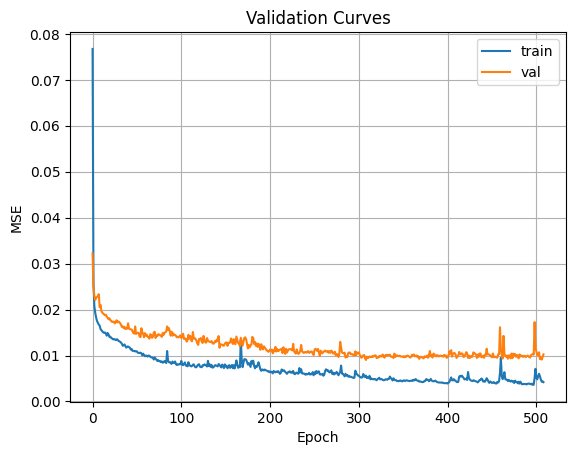

In [74]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.grid()
plt.show()

In [75]:
# predict y
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
y_est_pred = model.predict(X_est)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


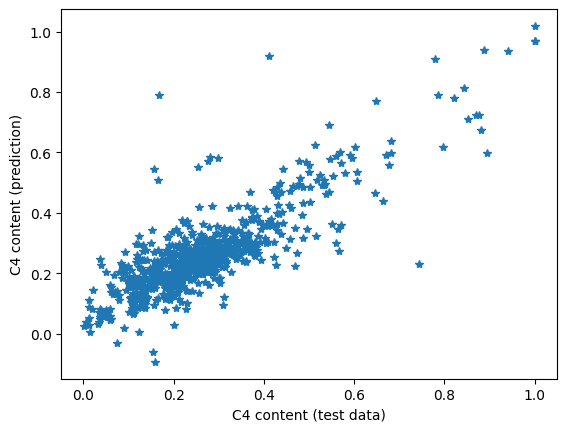

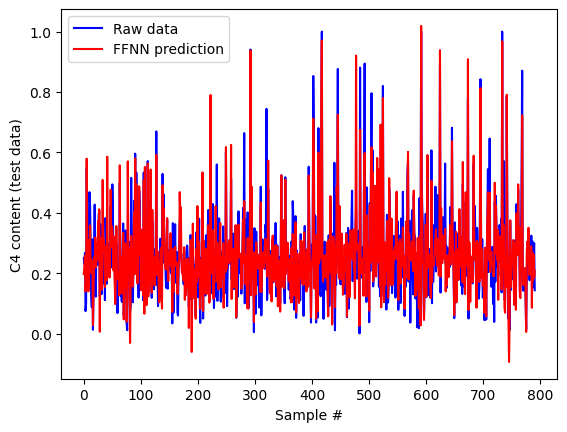

In [76]:
# plots of raw and predicted data
plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('C4 content (test data)')
plt.ylabel('C4 content (prediction)')

plt.figure()
plt.plot(y_test, 'b', label='Raw data')
plt.plot(y_test_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

Text(0.5, 1.0, 'residual plot')

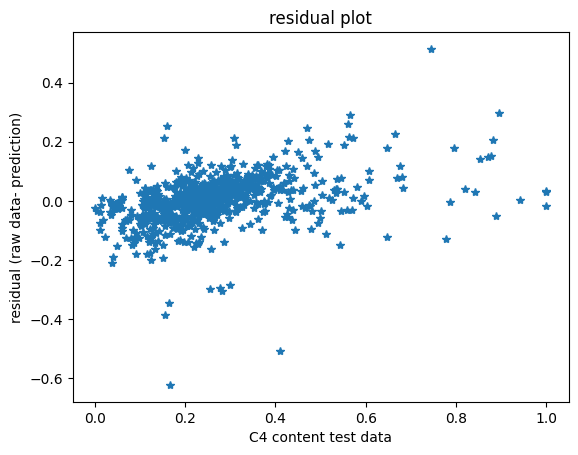

In [77]:
# residuals
plt.figure()
plt.plot(y_test, y_test-y_test_pred, '*')
plt.xlabel('C4 content test data')
plt.ylabel('residual (raw data- prediction)')
plt.title('residual plot')

In [78]:
# metrics
from sklearn.metrics import r2_score
print('R2 for test dataset:', r2_score(y_test, y_test_pred))
print('R2:', r2_score(y_val, y_val_pred))
print('R2:', r2_score(y_est, y_est_pred))

R2 for test dataset: 0.6908022539262135
R2: 0.6528771062684016
R2: 0.8495086346569065
